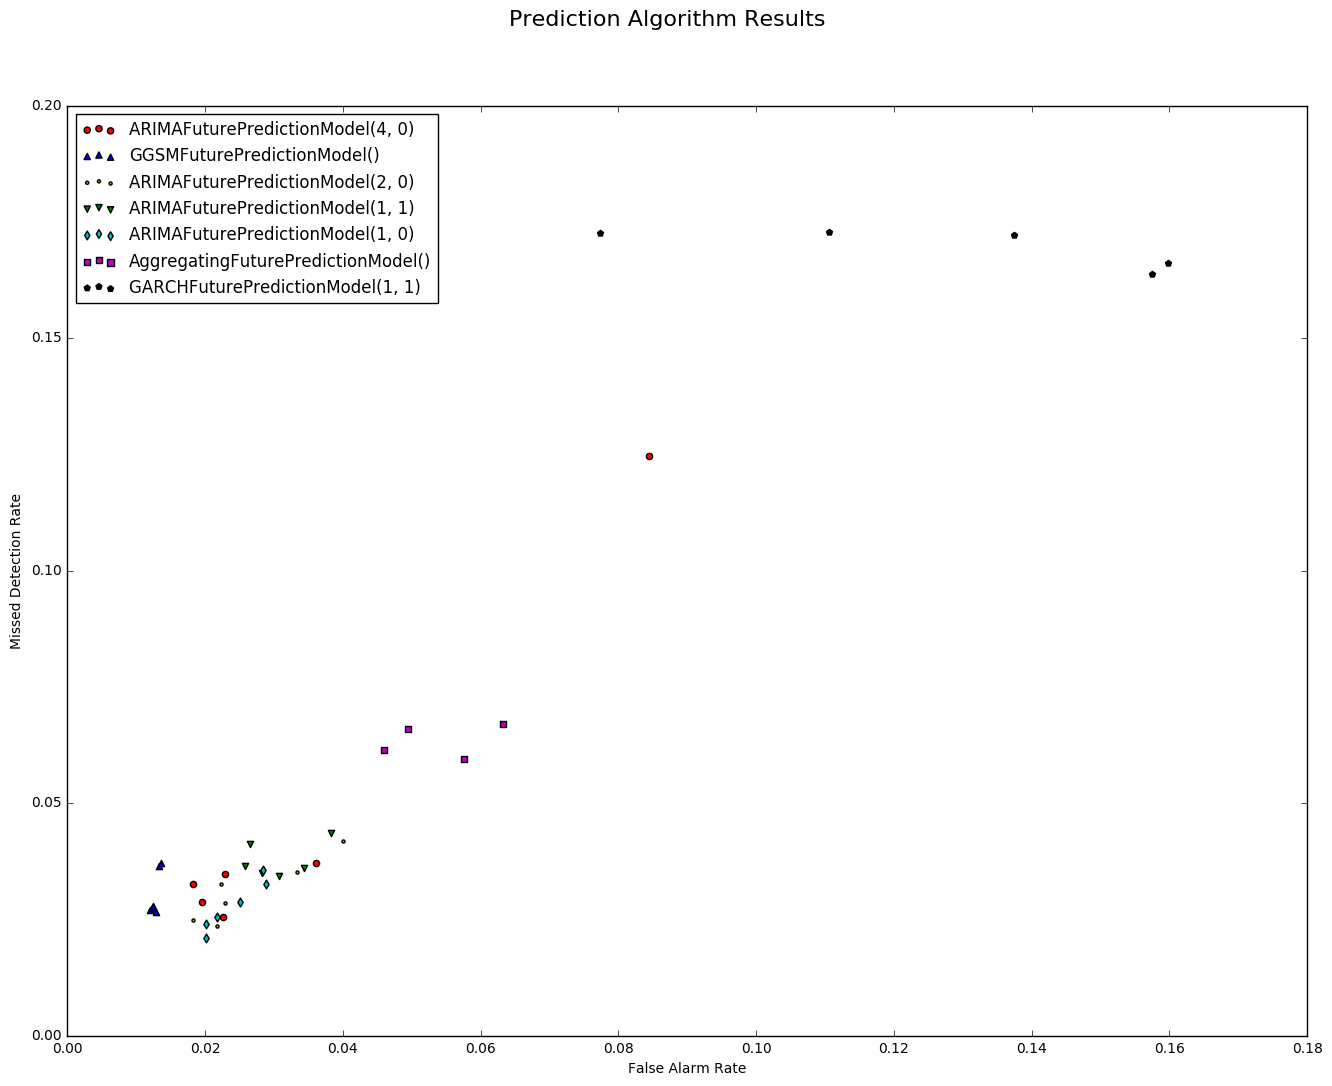

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

algorithm_results = dict()

for line in open('prediction_results'):           
    line = line.replace('\n', '')
    toks = line.split(', ')
    
    if len(toks) == 5:
        algorithm = toks[0].replace('Model=', '')
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 5:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[3:]))
    else:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[4:]))

fig = plt.figure(figsize=(16, 12))
fig.suptitle('Prediction Algorithm Results', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    y = [r[1] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

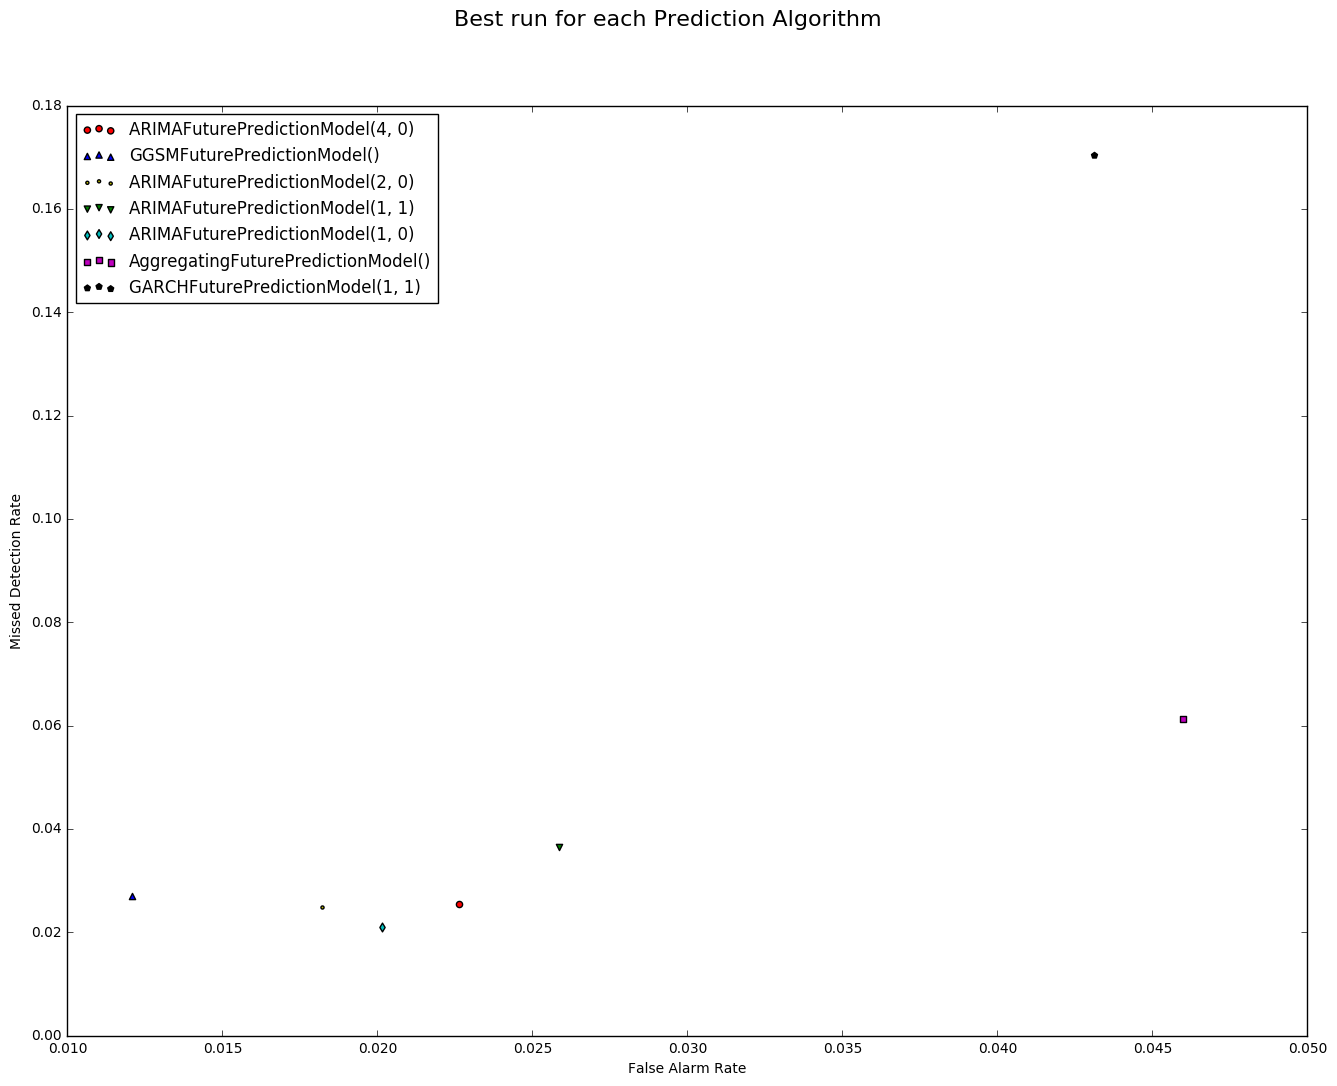

In [8]:
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Best run for each Prediction Algorithm', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][0]]
    y = [ algorithm_result[0][1]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')